## Lending club Case Study

LendingClub is USA’s largest lending marketplace, connecting borrowers with investors since 2007.

Both borrower and investor are registered as a member of Lending club. Borrower applied for loan, then lending club platform perform some risk analysis on the applied loan and pass it to investors with approved ammount ( lenders/Investors ). 

Lenders ( Investors ) makes money from the interest they get from money they lend and Lending club makes money from source fees and other fees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [5]:
# Loading loan data
loan = pd.read_csv("loan/loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Detrmining the number of column and rows

loan.shape

(39717, 111)

##### Observations :  
1. There are 39717 rows and 111 features. So data set is a high dimentional data set. 
2. We also find there are lots of features that is having only NA value which will not contribute to our analysys.
3. There are few features having same constant values which will not contribute to our analysis.
4. There are identity columns having unique values which will add any value to the data set for analysis.

####  Checking and dropping the columns ( features ) having null values

In [7]:
#checking first half of the columns for null value
loan.isnull().sum().head(int(loan.shape[1]/2))

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       2459
emp_length                      1075
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                           12940
purpose                            0
title                             11
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
i

In [8]:
#checking second half of the columns for null values
loan.isnull().sum().tail(int(loan.shape[1]/2))

acc_now_delinq                        0
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717
chargeoff_within_12_mths             56
delinq_amnt                           0
mo_sin_old_il_acct                39717


In [9]:
#Dropping columns having all null values
loan.dropna(axis=1, how='all', inplace=True)

In [10]:
# There was ( 111-57) = 54 columns having all null value. Now the number of column become 57.
loan.shape

(39717, 57)

In [12]:
#Getting the information about load data set
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Dropping the features having same constant value through out.
Features with constant values through out
1. delinq_amnt
2. acc_now_delinq
3. pymnt_plan

In [13]:
loan.drop(columns =["delinq_amnt","acc_now_delinq","pymnt_plan"], axis=1, inplace=True)

#### Dropping the identity columns having unique values
1. id
2. member_id

In [14]:
loan.drop(columns =["id","member_id"], axis=1, inplace=True)

#### Identifying customer behaviour variable and removal
Customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. So following customer behavior variable can be deleted
1. delinq_2yrs
2. earliest_cr_line
3. inq_last_6mths
4. open_acc
5. pub_rec
6. revol_bal
7. revol_util
8. total_acc
9. out_prncp
10. out_prncp_inv
11. total_pymnt
12. total_pymnt_inv
13. total_rec_prncp
14. total_rec_int
15. total_rec_late_fee
16. recoveries
17. collection_recovery_fee
18. last_pymnt_d
19. last_pymnt_amnt
20. last_credit_pull_d
21. application_type

In [39]:
loan.drop(columns =["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type"], axis=1, inplace=True)

In [40]:
#Checking the number of available features now
loan.shape

(39717, 31)

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

### Data Analysis

Since loan status "current" is ambiguious as loan defaulter point of view ( this loan might be dafaulter in future ) 
and analysis is being done to understand the driving factors (or driver variables) behind loan default, we can consider only "Fully Paid" and "Charged Off" loans.

In [48]:
loan = loan[~(loan.loan_status == "Current")]

In [49]:
loan.shape

(38577, 31)

In [50]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,collections_12_mths_ex_med,policy_code,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,13672.000000,2740.000000,38521.0,38577.0,38521.0,37880.000000,38538.0
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,35.882534,69.260949,0.0,1.0,0.0,0.043479,0.0
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,22.028093,43.987761,0.0,0.0,0.0,0.204583,0.0
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,18.000000,19.750000,0.0,1.0,0.0,0.000000,0.0
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,34.000000,90.000000,0.0,1.0,0.0,0.000000,0.0
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,52.000000,104.000000,0.0,1.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,129.000000,0.0,1.0,0.0,2.000000,0.0


##### Univariate analysis :

##### Analysing Annual Income
1. Above loan.describe() data indicates there is some outliers. 
2. We can create bin of annual income for further analysis

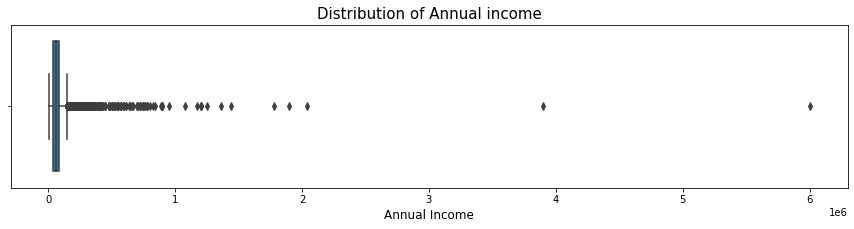

In [55]:
#Analysing and getting rid of outliers
plt.figure(figsize=[15,3])
sns.boxplot(loan.annual_inc)
plt.title("Distribution of Annual income", fontsize=15)
plt.xlabel("Annual Income", fontsize=12)
plt.show()

In [72]:
# Removing annual income more than 125000 from dataset to get rid of outliers
loan = loan[~(loan.annual_inc > 125000)]

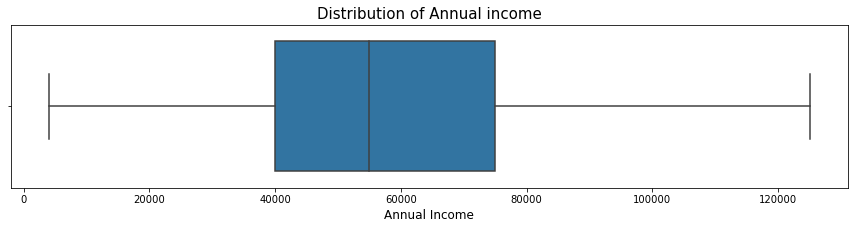

In [73]:
# Checking after removing outliers
plt.figure(figsize=[15,3])
sns.boxplot(loan.annual_inc)
plt.title("Distribution of Annual income", fontsize=15)
plt.xlabel("Annual Income", fontsize=12)
plt.show()